In [1]:
#Data pre-processed version
#Dependencies

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import math as m
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from voicedata import voicedata

# Data Manupulation
import numpy as np
import pandas as pd
import math

# Plotting graphs
import matplotlib.pyplot as plt

# Required Sklearn libraries Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

#testing model
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, mean_squared_error, r2_score

# Data fetching
#from pandas_datareader import data as pdr

#using python 3.6

Using TensorFlow backend.


In [2]:
#Getting data
#df = pd.read_csv("Resources\\voice.csv")
#train = pd.read_csv("Resources\\voice.csv")
#test  = pd.read_csv("Resources\\voice.csv")

vtrainfile = 'vtrain_200'
vtestfile  = 'vtest_200'
(X_train, X_test,
genc, g_train, g_train_enc, g_train_cat, g_test, g_test_enc, g_test_cat,
nenc, n_train, n_train_enc, n_train_cat, n_test, n_test_enc, n_test_cat,
ienc, i_train, i_train_enc, i_train_cat, i_test, i_test_enc, i_test_cat) = voicedata(vtrainfile, vtestfile)


(6750, 4)
(2250, 4)


In [3]:
# Write to the log:
print("Training set has {0[0]} rows and {0[1]} columns".format(X_train.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(X_test.shape))
# Any files you write to the current directory get shown as outputs

Training set has 6750 rows and 40 columns
Test set has 2250 rows and 40 columns


In [4]:
#print ('Loading files...\n')
#Xtr = pd.read_csv('../input/train.csv')
Xtr = X_train
#Xts = pd.read_csv('../input/test.csv')
Xts = X_test
#ytr = Xtr['label']
ytr = vtrainfile
#del Xtr['label']

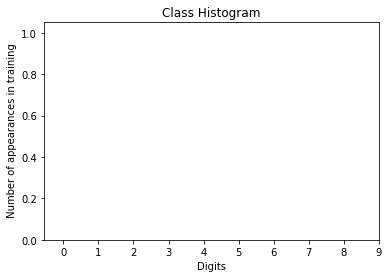

In [19]:
#Histogram
plt.hist(ytr, normed = False, bins = 5000)
plt.xlabel('Digits')
plt.ylabel(' Number of appearances in training')
plt.title('Class Histogram')
plt.xticks(range(10), ['%d' % i for i in range(10)])
plt.savefig('histogram.png')

In [6]:
#print('Classes are well balanced\n')

#print("Time to see how this digits look like\n")

In [20]:
#We take the first rows and reshape them  to get (28, 28) images
#Let's make a funcion to do that. We might need it again

def see_digits(X, labels, n_digits, figure_name):
    X_ = X[: n_digits].as_matrix()
    X_ = X_.reshape(X_.shape[0], 28, 28)
    fig = plt.figure()
    fig.suptitle(figure_name)
    for i in range (n_digits):
        fig.add_subplot(int(m.sqrt(n_digits))+1, int(m.sqrt(n_digits))+1, i+1)
        plt.imshow(X_[i])
        plt.axis('off')
        plt.title(str(labels[i]))
    fig.tight_layout()
    plt.show()

In [21]:
#now lets see the first 10 digits
see_digits(Xtr, ytr, 10, 'Digits and true labels')

#Divide by 255 to normalize data
Xtr = Xtr/255
Xts = Xts/255
 
pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier())
])


AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

In [9]:
#Best parameters are: N_COMPONENTS = 30, NEIGHBORS = 4 , WEIGHTS =' distance'
#add more params when not running in kaggle
N_COMPONENTS = [20, 50]
NEIGHBORS = [3, 4]
WEIGHTS = ['distance']

param_grid = [{
        'pca__n_components': N_COMPONENTS,
        'clf__n_neighbors': NEIGHBORS,
        'clf__weights': WEIGHTS
    }]

print('Training all possible combinations...\n')
print('*This could take one hour or two*\n')
grid = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid)
grid.fit(Xtr, ytr)
print(pd.DataFrame(grid.cv_results_), '\n')

print('Using best classifier to predict...\n')
yp = grid.best_estimator_.predict(Xts)

Training all possible combinations...

*This could take one hour or two*



NameError: name 'pipe' is not defined

In [10]:
#Now lets check some digits and their predicted labels
see_digits(Xts, yp, 10, 'Digits and predicted labels')

NameError: name 'yp' is not defined

In [11]:
#create submission
submission = pd.DataFrame({
    "ImageId": np.arange(1, yp.shape[0] + 1),
    "Label": yp
})

print('Creating submission file...\n')
submission.to_csv("submission.csv", index=False)
print('Done!\n')

NameError: name 'yp' is not defined